### 1. Importing required libraries and uploading the dataset

In [97]:
%reset -f
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir(r'/home/jai/Downloads/Rapido Assignment')

dt = pd.read_excel('Rapido Data Analyst Assignment DataSet.xlsx')

### 2.Observing the datasets

In [101]:
total_rows=len(dt.axes[0])
total_cols=len(dt.axes[1])
total_rows
total_cols

10

*There are total 10 columns and 44,587 rows in the dataset*

In [105]:
dt.isna().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

*There are no missing values in the dataset*

In [106]:
dt.describe()

,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,4.458700e+04,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000
mean,1.546632e+12,17.427598,17.427598,17.427520,17.427520,5.094359,15.819835,53.872833
std,1.518684e+08,0.030151,0.030151,0.037690,0.037690,3.365008,23.462865,33.430462
min,1.546368e+12,17.330339,17.330339,12.921696,12.921696,-1.000000,0.022750,20.000000
25%,1.546503e+12,17.404811,17.404811,17.405149,17.405149,2.744500,8.428525,36.000000
50%,1.546611e+12,17.431681,17.431681,17.430460,17.430460,4.299000,13.126250,46.000000
75%,1.546772e+12,17.446578,17.446578,17.446780,17.446780,6.679500,20.111167,60.000000
max,1.546886e+12,17.528885,17.528885,17.736155,17.736155,52.801000,4134.388700,1670.000000


*1. The latitude and longitude coordinates are same for both pick up and drop location*


*2. The minimum distance travelled is -1 which is not possible*

In [110]:
dt.groupby('travel_distance').[].mean()

,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_time,trip_fare
travel_distance,,,,,,,
-1.000,1.546574e+12,17.437150,17.437150,17.425227,17.425227,14.033628,959.0
0.000,1.546629e+12,17.425048,17.425048,17.425030,17.425030,2.905218,20.0
0.001,1.546662e+12,17.425055,17.425055,17.425055,17.425055,4.473346,20.0
0.002,1.546555e+12,17.437611,17.437611,17.437619,17.437619,53.155205,20.0
0.003,1.546568e+12,17.416130,17.416130,17.416108,17.416108,4.333473,20.0
...,...,...,...,...,...,...,...
32.407,1.546741e+12,17.466810,17.466810,17.447395,17.447395,57.244633,376.0
32.523,1.546524e+12,17.394880,17.394880,17.437105,17.437105,31.401633,348.0
40.543,1.546532e+12,17.462377,17.462377,17.338097,17.338097,83.046817,445.0


In [43]:
import datetime
def convert(x):
    return datetime.datetime.fromtimestamp(x/1e3)

dt['timestamp'] = dt['timestamp'].apply(lambda x: convert(x))
dt['date'] =dt['timestamp'].apply(lambda x :x.date())
dt['time'] =dt['timestamp'].apply(lambda x :x.time())

lst =[datetime.time(0, 0, 0),datetime.time(5, 0, 0),datetime.time(7, 30, 0),
      datetime.time(10, 30, 0),datetime.time(12, 0, 0),datetime.time(15, 0, 0),
      datetime.time(17, 0, 0),datetime.time(20, 0, 0),datetime.time(21, 30, 0)]

def TimeBin(x):
    if (x>datetime.time(0, 0, 0))&(x<=datetime.time(5, 0, 0)):
        return '01.Night (12 AM - 05 AM)'
    elif (x>datetime.time(5, 0, 0))&(x<=datetime.time(7, 30, 0)):
        return '02.Early Morning (05 AM - 07:30AM)'
    elif (x>datetime.time(7,30, 0))&(x<=datetime.time(10, 30, 0)):
        return '03.Office Start (07:30 AM - 10:30 AM)'
    elif (x>datetime.time(10,30, 0))&(x<=datetime.time(12, 30, 0)):
        return '04.Working Hours - Morning (10:30 AM - 12:30 PM)'
    elif (x>datetime.time(12,30, 0))&(x<=datetime.time(15, 00, 0)):
        return '05.Lunch(12:30 PM - 03:00 PM)'
    elif (x>datetime.time(15,00, 0))&(x<=datetime.time(17, 30, 0)):
        return '06.Working Hours - Evening(03:00 PM - 05:30 PM)'
    elif (x>datetime.time(17,30, 0))&(x<=datetime.time(20, 30, 0)):
        return '07.Office Return(05:30 PM - 08:30 PM)'
    elif (x>datetime.time(20,30, 0))&(x<=datetime.time(22, 00, 0)):
        return '08.Late Returns(08:30 PM - 10:00 PM)' 
    else:
        return '09.Late Night(10:00 PM - !2:00 AM)'
    
dt['timebin'] = dt['time'].apply(lambda x: TimeBin(x))

dt['timebin'].value_counts()

07.Office Return(05:30 PM - 08:30 PM)               10756
03.Office Start (07:30 AM - 10:30 AM)                8756
06.Working Hours - Evening(03:00 PM - 05:30 PM)      5918
05.Lunch(12:30 PM - 03:00 PM)                        5823
04.Working Hours - Morning (10:30 AM - 12:30 PM)     5481
08.Late Returns(08:30 PM - 10:00 PM)                 3970
09.Late Night(10:00 PM - !2:00 AM)                   2674
01.Night (12 AM - 05 AM)                              638
02.Early Morning (05 AM - 07:30AM)                    571
Name: timebin, dtype: int64

In [44]:
plot_data = pd.pivot_table(dt[['trip_id','date','timebin']],values = 'trip_id',
                                                columns = 'date',
                                                index = 'timebin',
                                                aggfunc = 'count').reset_index()

plot_data.columns = ['timebin','Thursday','Friday','Saturday','Sunday','Monday','Tuesday']
plot_data

,timebin,Thursday,Friday,Saturday,Sunday,Monday,Tuesday
0,01.Night (12 AM - 05 AM),52,71,87,150,159,119
1,02.Early Morning (05 AM - 07:30AM),76,102,89,98,61,145
2,03.Office Start (07:30 AM - 10:30 AM),1621,1709,1745,1183,581,1917
3,04.Working Hours - Morning (10:30 AM - 12:30 PM),1006,1050,951,771,522,1181
4,05.Lunch(12:30 PM - 03:00 PM),987,940,1068,999,706,1123
5,06.Working Hours - Evening(03:00 PM - 05:30 PM),977,1019,1092,1042,733,1055
6,07.Office Return(05:30 PM - 08:30 PM),1951,1995,2064,1576,1067,2103
7,08.Late Returns(08:30 PM - 10:00 PM),664,693,799,595,440,779
8,09.Late Night(10:00 PM - !2:00 AM),411,444,555,432,340,492


In [82]:
trips_cust = pd.pivot_table(dt[['customer_id','trip_id','date']],values = 'trip_id',
                                                columns = 'date',
                                                index = 'customer_id',
                                                aggfunc = 'count')

trips_cust.columns = ['Thursday','Friday','Saturday','Sunday','Monday','Tuesday']
trips_cust['Total Trips'] = trips_cust.sum(axis = 1, skipna = True) .astype(int)
trips_cust

,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Total Trips
customer_id,,,,,,,
CUST_001,NaN,NaN,NaN,3.0,3.0,2.0,8
CUST_002,NaN,NaN,NaN,1.0,NaN,NaN,1
CUST_003,NaN,1.0,1.0,2.0,1.0,1.0,6
CUST_004,3.0,1.0,NaN,4.0,4.0,3.0,15
CUST_005,NaN,NaN,NaN,1.0,1.0,NaN,2
...,...,...,...,...,...,...,...
CUST_9995,1.0,NaN,NaN,NaN,NaN,NaN,1
CUST_9996,1.0,NaN,NaN,NaN,NaN,NaN,1
CUST_9997,2.0,NaN,NaN,1.0,NaN,NaN,3


,no of customers
Total Trips,
1.0,10009
2.0,3884
3.0,1741
4.0,1144
5.0,730
6.0,483
7.0,333
8.0,282
9.0,169


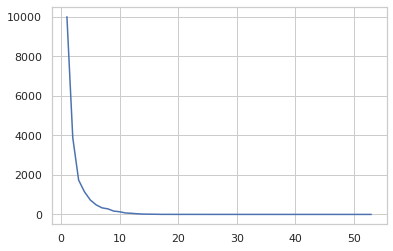

In [86]:
##plt.plot(trips_cust.groupby('Total Trips').size())
#pd.DataFrame() 
trip_usertype['no of customers']=trips_cust.groupby('Total Trips').size()
plt.plot(trip_usertype)
trip_usertype

In [14]:
import seaborn as sns
sns.set(style="whitegrid")

In [19]:
dt.groupby('customer_id').count('trip_id')

TypeError: count() takes 1 positional argument but 2 were given

In [27]:
if (dt.customer_id.value_counts()==1):
    return 'Single time user'
else:
    return 'Multiple time user'

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)